<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/HW2/US_housing_price_prediction_2_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Mounted at /content/drive


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
housing.shape

(545, 13)

In [3]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [4]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [6]:
Y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [7]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars]) # scaling of the test values aswell
Y_test = df_test.pop('price')
X_test = df_test
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,semi-furnished
54,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,semi-furnished
171,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,semi-furnished
244,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
268,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,semi-furnished


In [8]:
def compute_loss(x, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 4D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """

    m = len(y) # Number of training examples
    predictions = x.dot(theta) # Output: (100,1)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(x, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_loss(x, y, theta)

    return theta, cost_history

In [9]:
x0_train = np.ones((len(X_train), 1))  # bias for training data
x0_test = np.ones((len(X_test), 1))  # bias for test data

#################################################################################################################################################################################

# Data for 2a) area, bedrooms, bathrooms, stories & parking

selected_features_2a = X_train.iloc[:, [0, 1, 2, 3, 9]] # area, bedrooms, bathrooms, stories, parking
X_train_2a = np.hstack((x0_train, selected_features_2a))  # training dataset for 1a
theta_2a = np.zeros(X_train_2a.shape[1])  # initializing of the thetas
X_test_2a = np.hstack((x0_test, X_test.iloc[:, [0, 1, 2, 3, 9]]))  # validation dataset for 1a

#################################################################################################################################################################################

# Data for 2b) area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
2
selected_features_2b = X_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
x_train_2b = np.hstack((x0_train, selected_features_2b))
theta_2b = np.zeros(x_train_2b.shape[1])
x_test_2b = np.hstack((x0_test, X_test.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]))


In [10]:
alpha = 0.08
iterations = 1500

# 2a)
theta_2a = np.zeros(X_train_2a.shape[1])  # initializing of the thetas again, so this cell can be ran continuously without the thetas (the run before) being saved
theta_2a, loss_history_2a = gradient_descent(X_train_2a, Y_train, theta_2a, alpha, iterations)
print('2a) Final value of theta =', theta_2a)
print('2a) loss_history =', loss_history_2a)
print('\n')

# 2b)
theta_2b = np.zeros(x_train_2b.shape[1])
theta_2b, loss_history_2b = gradient_descent(x_train_2b, Y_train, theta_2b, alpha, iterations)
print('2b) Final value of theta =', theta_2b)
print('2b) loss_history =', loss_history_2b)

2a) Final value of theta = [0.057828   0.38786507 0.0649854  0.31807271 0.13693526 0.09451274]
2a) loss_history = [0.03996826 0.03374446 0.02880134 ... 0.00572111 0.00572106 0.00572101]


2b) Final value of theta = [-0.00137301  0.37617609  0.06626012  0.31583887  0.13812421  0.07027093
  0.0370432   0.04063575  0.05411953]
2b) loss_history = [0.03526757 0.02685599 0.0212092  ... 0.00528801 0.00528796 0.00528792]


In [14]:
# 2a)
test_loss_2a = compute_loss(X_test_2a, Y_test, theta_2a)
print('2a) test_loss =', test_loss_2a)

# 2b)
test_loss_2b = compute_loss(x_test_2b, Y_test, theta_2b)
print('2b) test_loss =', test_loss_2b)

2a) test_loss = 0.007883690997497915
2b) test_loss = 0.0077377450795817915


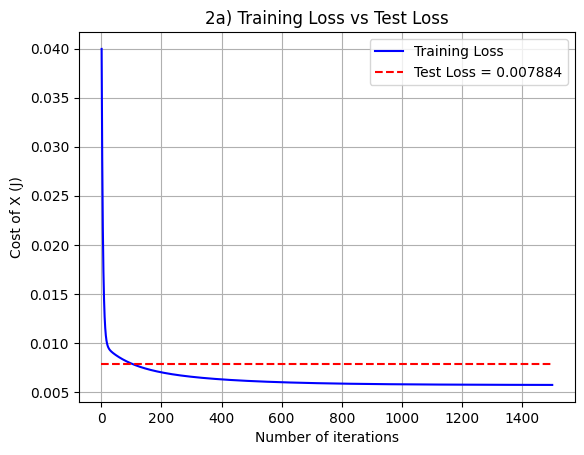

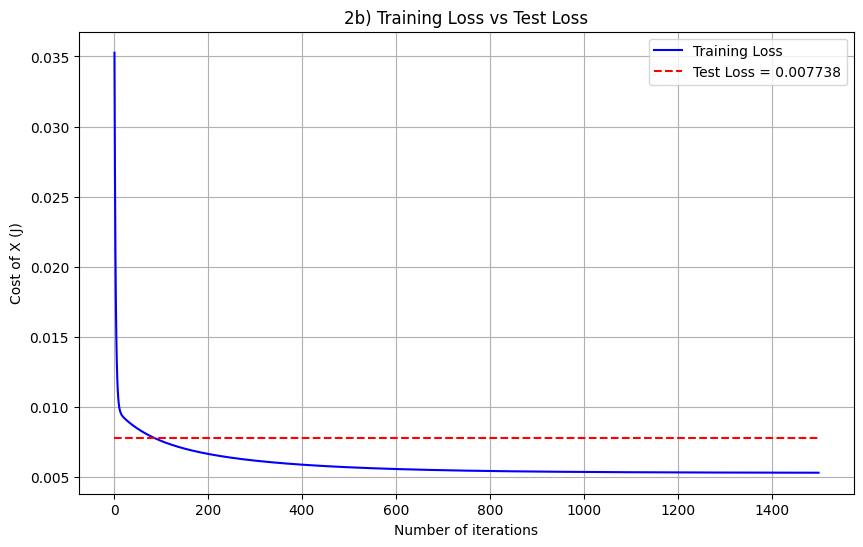

In [12]:
# 2a)
plt.figure
plt.plot(range(1, iterations + 1), loss_history_2a, color='blue', label='Training Loss')
plt.hlines(y=test_loss_2a, xmin=0, xmax=iterations, color='red', linestyle='--', label=f'Test Loss = {test_loss_2a:.6f}')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of X (J)')
plt.title('2a) Training Loss vs Test Loss')
plt.legend()
# Show the plot
plt.show()

# 2b)
plt.figure
plt.plot(range(1, iterations + 1), loss_history_2b, color='blue', label='Training Loss')
plt.hlines(y=test_loss_2b, xmin=0, xmax=iterations, color='red', linestyle='--', label=f'Test Loss = {test_loss_2b:.6f}')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of X (J)')
plt.title('2b) Training Loss vs Test Loss')
plt.legend()
